# Ensemble Learning (Part-2)

Ensemble learning is a machine learning technique that aggregates two or more learners (e.g. regression models, neural networks) in order to produce better predictions.

### Ensemble Techniques

Ensemble techniques in machine learning involve combining multiple models to improve performance. One common ensemble technique is bagging, which uses bootstrap sampling to create multiple datasets from the original data and trains a model on each dataset. Another technique is boosting, which trains models sequentially, each focusing on the previous models' mistakes. Random forests are a popular ensemble method that uses decision trees as base learners and combines their predictions to make a final prediction. Ensemble techniques are effective because they reduce overfitting and improve generalization, leading to more robust models.

### Stacking 

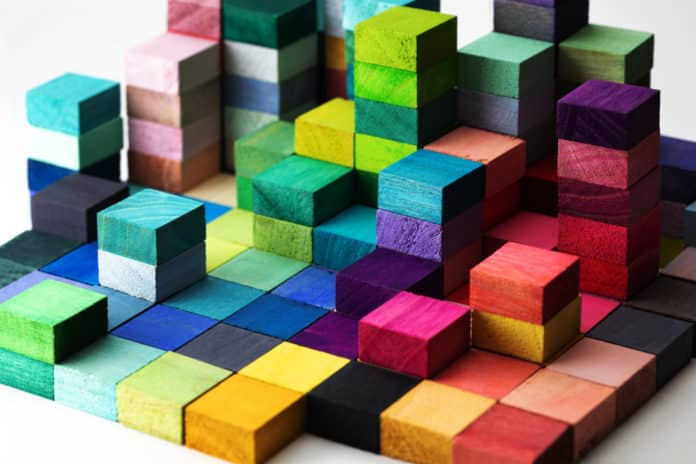

Stacking is an ensemble learning technique that uses predictions from multiple models (for example decision tree, knn or svm) to build a new model. This model is used for making predictions on the test set.

Stacking, also known as Stacked Generalization is an ensemble technique that combines multiple classifications or regression models via a meta-classifier or a meta-regressor. The base-level models are trained on a complete training set, then the meta-model is trained on the features that are outputs of the base-level model. The base-level often consists of different learning algorithms and therefore stacking ensembles are often heterogeneous. Here is a diagram illustrating the process

Below is a step-wise explanation for a simple stacked ensemble:

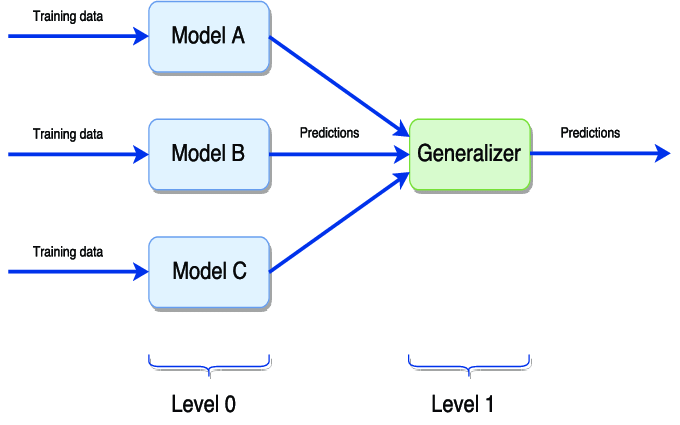

Step 1:The train set is split into 10 parts. 

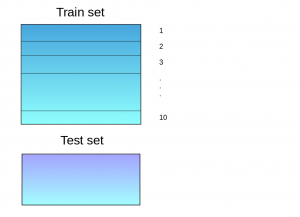

Step 2:A base model (suppose a decision tree) is fitted on 9 parts and predictions are made for the 10th part. This is done for each part of the train set. 

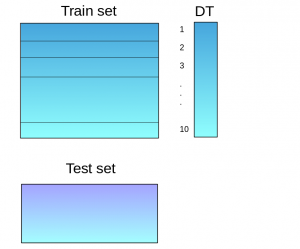

Step 3:The base model (in this case, decision tree) is then fitted on the whole train dataset.

Step 4:Using this model, predictions are made on the test set. 

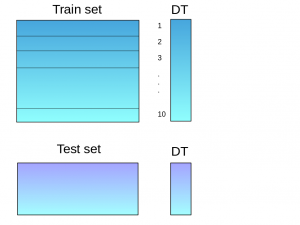

Step 5:Steps 2 to 4 are repeated for another base model (say knn) resulting in another set of predictions for the train set and test set. 

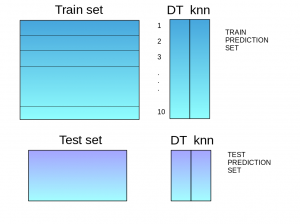

Step 6:The predictions from the train set are used as features to build a new model. 

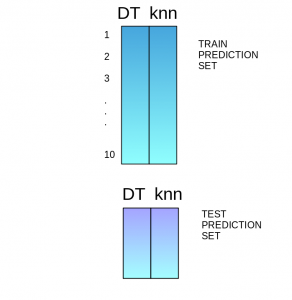


Step 7:This model is used to make final predictions on the test prediction set.

In order to simplify the above explanation, the stacking model we have created has only two levels. The decision tree and knn models are built at level zero, while a logistic regression model is built at level one. Feel free to create multiple levels in a stacking model.

### Blending 

Blending follows the same approach as stacking but uses only a holdout (validation) set from the train set to make predictions. In other words, unlike stacking, the predictions are made on the holdout set only. The holdout set and the predictions are used to build a model which is run on the test set. Here is a detailed explanation of the blending process:

Step 1: The train set is split into training and validation sets 

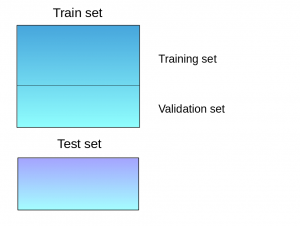

Step 2: Model(s) are fitted on the training set. 

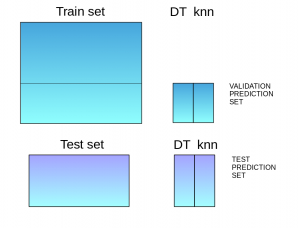

Step 3: The predictions are made on the validation set and the test set.

Step 4: The validation set and its predictions are used as features to build a new model.

Step 5: This model is used to make final predictions on the test and meta-features.

The difference between stacking and blending is that Stacking uses out-of-fold predictions for the train set of the next layer (i.e meta-model), and Blending uses a validation set (let’s say, 10-15% of the training set) to train the next layer.

I'll build two models, decision tree and knn, on the train set in order to make predictions on the validation set.

In [220]:
# load the wine dataset 

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_wine

x = load_wine().data
y = load_wine().target



In [221]:
x

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [222]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [223]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1)


X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1)



In [224]:
# converting x_val and x_test into dataframe

x_val=pd.DataFrame(X_val)
x_test=pd.DataFrame(X_test)

In [225]:
# Build model

# DecisionTree

model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [226]:
val_pred = model.predict(x_val)
test_pred = model.predict(x_test)

In [227]:
val_pred = pd.DataFrame(val_pred)
test_pred = pd.DataFrame(test_pred)

In [228]:
# Build model
# KNearestClassifier

model1 = KNeighborsClassifier()
model1.fit(X_train, y_train)


KNeighborsClassifier()

In [229]:
model1.predict(x_test)

array([2, 1, 2, 2, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1,
       2, 0, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 2, 1])

In [230]:
model1.score(X_train, y_train)

0.839622641509434

In [231]:
val_pred1 = model.predict(x_val)
test_pred1 = model.predict(x_test)

In [234]:
val_pred.shape

(36, 1)

In [235]:
val_pred1.shape

(36,)

In [236]:
val_pred1 = pd.DataFrame(val_pred1)
test_pred1 = pd.DataFrame(test_pred1)



Combining the meta-features and the validation set, a logistic regression model is built to make predictions on the test set.


In [237]:
df_val = pd.concat([x_val, val_pred, val_pred1], ignore_index=True)
df_test=pd.concat([x_test, test_pred,test_pred1],ignore_index=True)




In [241]:
model3 = LogisticRegression()
model3.fit(X_train, y_train)

/home/jagannath/100OfCode/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [244]:
model3.score(X_train, y_train)

0.9811320754716981

### Bagging 

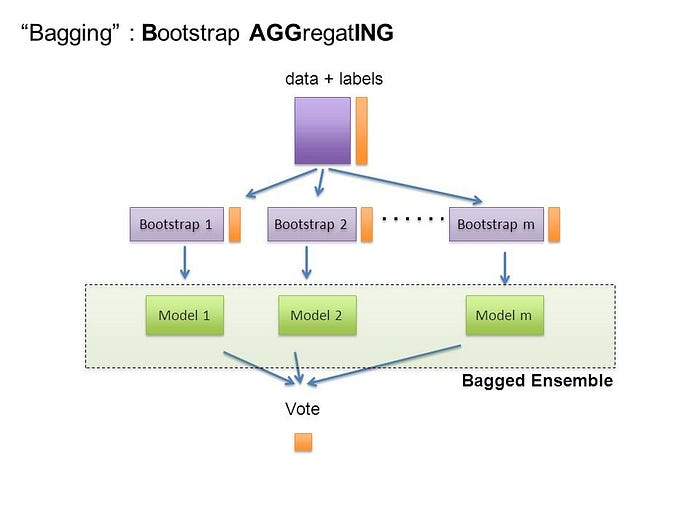

`Bagging`, is shorthand for the combination of bootstrapping and aggregating. Bootstrapping is a method to help decrease the variance of the classifier and reduce overfitting, by resampling data from the training set with the same cardinality as the original set. The model created should be less overfitted than a single individual model.

A high variance for a model is not good, suggesting its performance is sensitive to the training data provided. So, even if more the training data is provided, the model may still perform poorly. And, may not even reduce the variance of our model.

Bagging is an effective method when you have limited data, and by using samples you’re able to get an estimate by aggregating the scores over many samples.

The simplest approach with bagging is to use a couple of small subsamples and bag them, if the ensemble accuracy is much higher than the base models, it’s working; if not, use larger subsamples.Using larger subsamples is not guaranteed to improve your results. In bagging there is a tradeoff between base model accuracy and the gain you get through bagging. The aggregation from bagging may improve the ensemble greatly when you have an unstable model, yet when your base models are more stable — been trained on larger subsamples with higher accuracy — improvements from bagging reduces.

Once the bagging is done, and all the models have been created on (mostly) different data, a weighted average is then used to determine the final score.

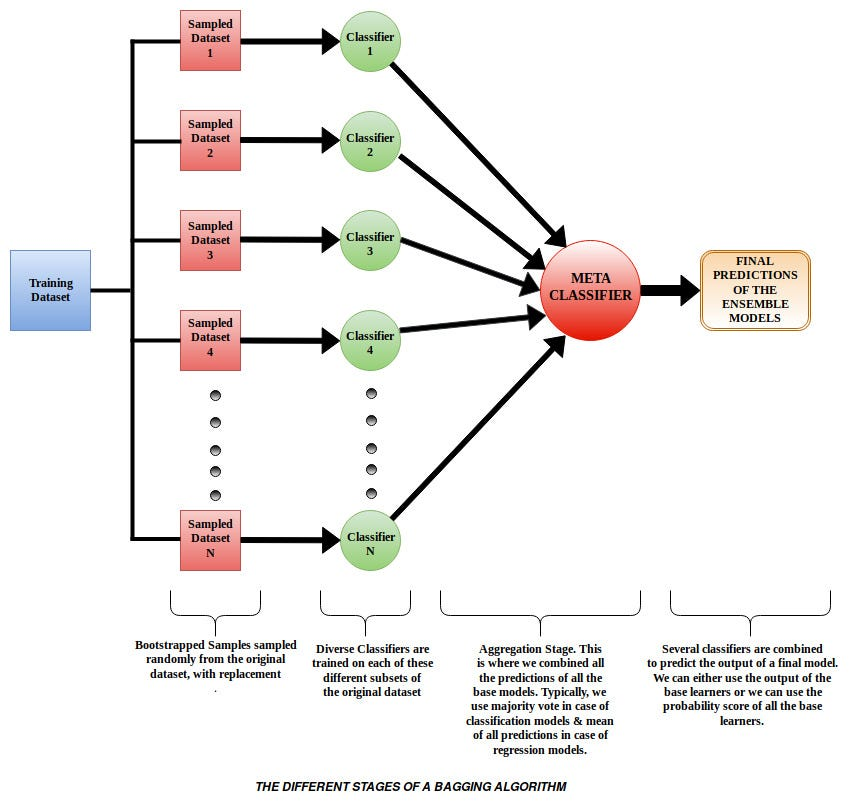

There are three main terms describing the ensemble (combination) of various models into one more effective model:

`Bagging` to decrease the model’s variance;

`Boosting` to decreasing the model’s bias, and;

`Stacking` to increasing the predictive force of the classifier.


#### Explanation with figure

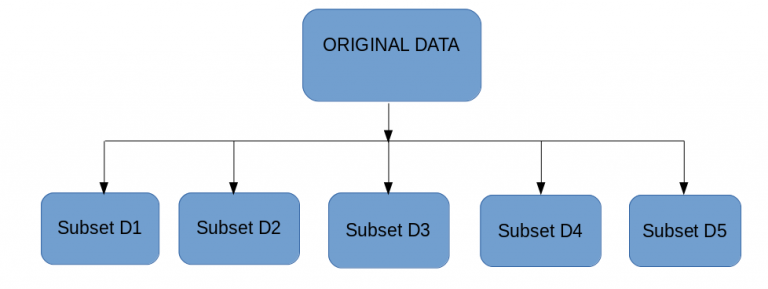

Step 1: Multiple subsets are created from the original dataset, selecting observations with replacement.

Step 2: A base model (weak model) is created on each of these subsets.

Step 3: The models run in parallel and are independent of each other.

Step 4: The final predictions are determined by combining the predictions from all the models. 

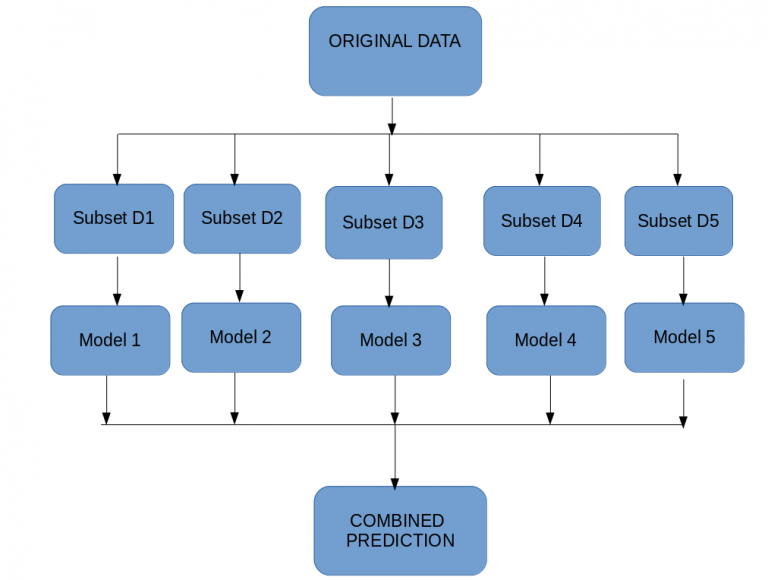

In [247]:
from sklearn.datasets import load_wine
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score



# define dataset
X,y = load_wine().data,load_wine().target

In [248]:
# Create classifiers
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
knn = KNeighborsClassifier()
svc = SVC()
rg = RidgeClassifier()
clf_array = [rf, et, knn, svc, rg]
for clf in clf_array:
    vanilla_scores = cross_val_score(clf, X, y, cv=10, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf,max_samples=0.4, max_features=10, random_state=42)
    bagging_scores = cross_val_score(bagging_clf, X, y, cv=10,n_jobs=-1)
    
    print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [{0}]".format(clf.__class__.__name__,vanilla_scores.mean(), vanilla_scores.std()))
    print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n".format(clf.__class__.__name__,bagging_scores.mean(), bagging_scores.std()))



Mean of: 0.978, std: (+/-) 0.027 [RandomForestClassifier]
Mean of: 0.983, std: (+/-) 0.025 [Bagging RandomForestClassifier]

Mean of: 0.989, std: (+/-) 0.022 [ExtraTreesClassifier]
Mean of: 0.989, std: (+/-) 0.022 [Bagging ExtraTreesClassifier]

Mean of: 0.675, std: (+/-) 0.070 [KNeighborsClassifier]
Mean of: 0.827, std: (+/-) 0.091 [Bagging KNeighborsClassifier]

Mean of: 0.681, std: (+/-) 0.087 [SVC]
Mean of: 0.675, std: (+/-) 0.056 [Bagging SVC]

Mean of: 0.983, std: (+/-) 0.025 [RidgeClassifier]
Mean of: 0.972, std: (+/-) 0.037 [Bagging RidgeClassifier]



In all but one of the classifiers, we had lower variance as shown above . As well, the accuracy of classifiers all increased except for SVC. Looks like this bagging thing actually works.

So our bagged individual classifiers are (mostly) better, but which one do we choose?

`Let’s Vote!`

Sklearn’s `VotingClassifier` allows you to combine different machine learning classifiers, and perform a vote on what the predicted class label(s) are for a record.

In [249]:
from sklearn.ensemble import VotingClassifier
clf = [rf, et, knn, svc, rg]
eclf = VotingClassifier(estimators=[('Random Forests', rf), ('Extra Trees', et), ('KNeighbors', knn), ('SVC', svc), ('Ridge Classifier', rg)], voting='hard')
for clf, label in zip([rf, et, knn, svc, rg, eclf], ['Random Forest', 'Extra Trees', 'KNeighbors', 'SVC', 'Ridge Classifier', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))



Accuracy: 0.98 (+/- 0.03) [Random Forest]
Accuracy: 0.98 (+/- 0.03) [Extra Trees]
Accuracy: 0.68 (+/- 0.07) [KNeighbors]
Accuracy: 0.68 (+/- 0.09) [SVC]
Accuracy: 0.98 (+/- 0.03) [Ridge Classifier]
Accuracy: 0.98 (+/- 0.03) [Ensemble]




With our bagged ensemble results shown above, we have an increase in accuracy and a decrease in variance, so our ensemble model is working as expected after we’ve combined all the various models into one.

Now that we know how well our model(s) are doing individually and together, does that actually look.


### Boosting 

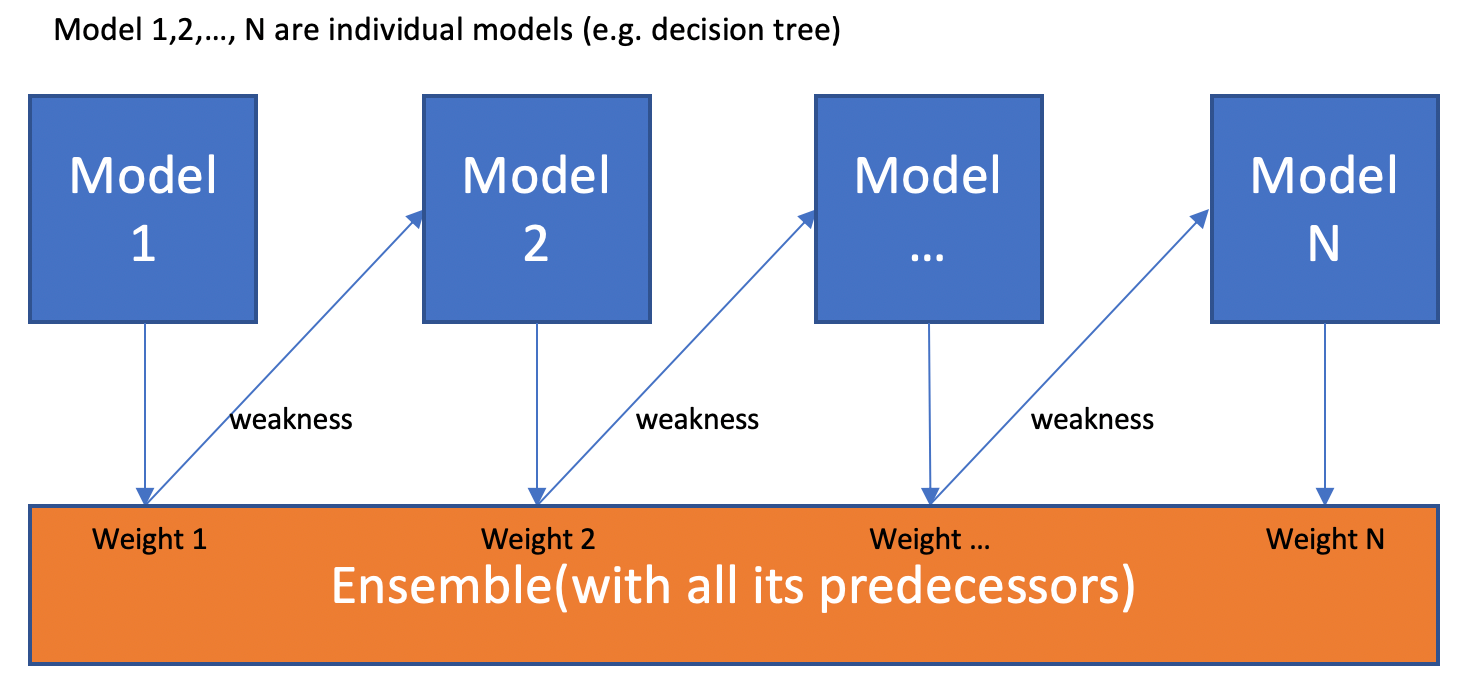

The main idea of boosting is to add additional models to the overall ensemble model sequentially. Previously with bagging, we averaged each individual model created. This time with each iteration of boosting, a new model is created and the new base-learner model is trained (updated) from the errors of the previous learners.

The algorithm creates multiple weak models whose output is added together to get an overall prediction. This is ensemble modelling from earlier. The now boosted gradient shifts the current prediction nudging it to the true target, in a similar fashion to how gradient descent moves toward the true values. The gradient descent optimization occurs on the output of the varies models, and not their individual parameters.

In [250]:


from sklearn.datasets import load_wine
# define dataset
X,y = load_wine().data,load_wine().target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)





`Adaptive boosting` or `AdaBoost` is one of the simplest boosting algorithms. Usually, decision trees are used for modelling. Multiple sequential models are created, each correcting the errors from the last model. AdaBoost assigns weights to the observations which are incorrectly predicted and the subsequent model works to predict these values correctly.

Below are the steps for performing the AdaBoost algorithm:

    Initially, all observations in the dataset are given equal weights.
    A model is built on a subset of data.
    Using this model, predictions are made on the whole dataset.
    Errors are calculated by comparing the predictions and actual values.
    While creating the next model, higher weights are given to the data points which were predicted incorrectly.
    Weights can be determined using the error value. For instance, higher the error more is the weight assigned to the observation.
    This process is repeated until the error function does not change, or the maximum limit of the number of estimators is reached.



In [251]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(random_state=1)
ada_boost.fit(X_train, y_train)
ada_boost.score(X_test,y_test)

/home/jagannath/100OfCode/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.8333333333333334

Parameters

base_estimators:

    It helps to specify the type of base estimator, that is, the machine learning algorithm to be used as base learner.

n_estimators:

    It defines the number of base estimators.
    The default value is 10, but you should keep a higher value to get better performance.

learning_rate:

    This parameter controls the contribution of the estimators in the final combination.
    There is a trade-off between learning_rate and n_estimators.

max_depth:

    Defines the maximum depth of the individual estimator.
    Tune this parameter for best performance.

n_jobs

    Specifies the number of processors it is allowed to use.
    Set value to -1 for maximum processors allowed.

random_state :

    An integer value to specify the random data split.
    A definite value of random_state will always produce same results if given with same parameters and training data.
